In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Task 1 and 2

Sentiment
Neutral     2653
Positive     556
Negative     519
Name: count, dtype: int64
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 352ms/step - accuracy: 0.6596 - loss: 0.9255 - val_accuracy: 0.7520 - val_loss: 0.7278
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 351ms/step - accuracy: 0.7077 - loss: 0.8179 - val_accuracy: 0.7520 - val_loss: 0.7467
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - accuracy: 0.7023 - loss: 0.7890 - val_accuracy: 0.7560 - val_loss: 0.7272
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 352ms/step - accuracy: 0.7414 - loss: 0.6015 - val_accuracy: 0.7239 - val_loss: 0.8805
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 349ms/step - accuracy: 0.8791 - loss: 0.3341 - val_accuracy: 0.6662 - val_loss: 1.0643
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 371ms/step - accuracy: 0.9479 - loss: 0.1579 - val_accuracy: 0.6273 - val_loss: 1.2933
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6178 - loss: 1.2776
Test Accuracy: 62.73%


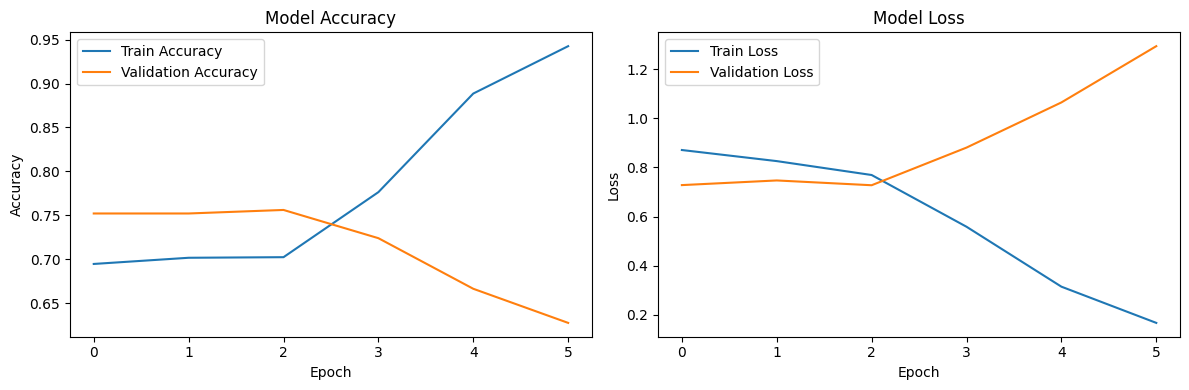

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Movie: The Lord of the Rings
Predicted Sentiment: Positive
Class Probabilities: [0.00744836 0.0025471  0.9900045 ]


In [3]:

df = pd.read_csv('imdb_data.csv')

# Preprocess the data
# Extract year from the Name column and clean the movie names
df['Year'] = df['Name'].str.extract(r'\((\d{4})\)')
df['Name'] = df['Name'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)

# Drop rows with missing ratings
df = df.dropna(subset=['Rating'])

# Convert Rating to float
df['Rating'] = df['Rating'].astype(float)

# Categorize ratings into sentiment classes
def categorize_sentiment(rating):
    if rating >= 7.5:
        return 'Positive'
    elif 5.0 <= rating < 7.5:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Rating'].apply(categorize_sentiment)

# Check class distribution
print(df['Sentiment'].value_counts())

# Prepare the data for modeling
X = df['Name']  # Using movie names as text input
y = df['Sentiment']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_categorical, test_size=0.2, random_state=42
)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Function to predict sentiment for new movie names
def predict_sentiment(movie_name):
    sequence = tokenizer.texts_to_sequences([movie_name])
    padded = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded)
    predicted_class = np.argmax(prediction)
    sentiment = label_encoder.inverse_transform([predicted_class])[0]
    return sentiment, prediction[0]

# Test the prediction function
test_movie = "The Lord of the Rings"
sentiment, probabilities = predict_sentiment(test_movie)
print(f"Movie: {test_movie}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Class Probabilities: {probabilities}")

# Task 3

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 285ms/step - accuracy: 0.6345 - loss: 0.9501 - val_accuracy: 0.7520 - val_loss: 0.7281
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.6973 - loss: 0.8406 - val_accuracy: 0.7520 - val_loss: 0.7348
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - accuracy: 0.7113 - loss: 0.7938 - val_accuracy: 0.7534 - val_loss: 0.7215
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.7183 - loss: 0.6989 - val_accuracy: 0.6957 - val_loss: 0.8408
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - accuracy: 0.8392 - loss: 0.4560 - val_accuracy: 0.6314 - val_loss: 1.0318
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - accuracy: 0.9109 - loss: 0.2658 - val_accuracy: 0.6300 - val_loss: 1.2536
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6342 - loss: 1.2322
Test Accuracy: 63.00%


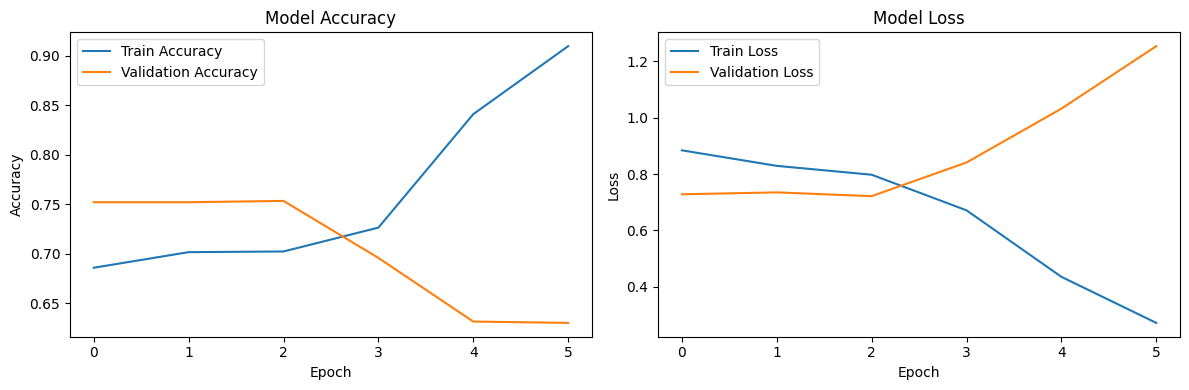

In [4]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Name'])
X_sequences = tokenizer.texts_to_sequences(df['Name'])
X_padded = pad_sequences(X_sequences, maxlen=100)

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Sentiment'])
y_categorical = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_categorical, test_size=0.2, random_state=42
)

# Build the improved model with Dropout
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Dropout(0.3))  # Dropout after Embedding
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))  # Dropout after LSTM
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout after Dense layer
model.add(Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model with EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Task 4


Training with Embedding Dimension: 50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy for dim=50: 75.20%

Training with Embedding Dimension: 150
Test Accuracy for dim=150: 75.20%

Training with Embedding Dimension: 200
Test Accuracy for dim=200: 75.20%


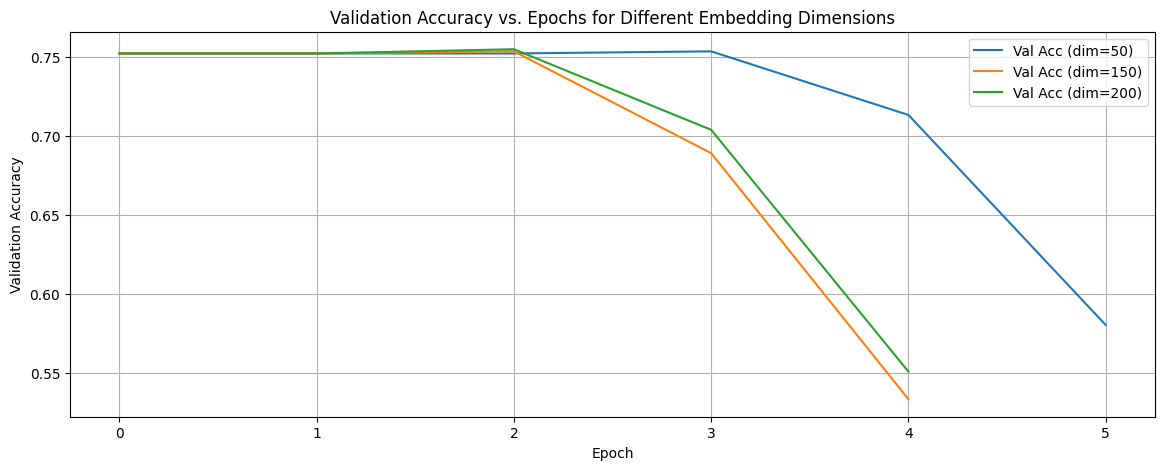

In [1]:



# Extract year and clean movie names
df['Year'] = df['Name'].str.extract(r'\((\d{4})\)')
df['Name'] = df['Name'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)

# Drop rows with missing ratings
df = df.dropna(subset=['Rating'])
df['Rating'] = df['Rating'].astype(float)

# Sentiment labeling
def categorize_sentiment(rating):
    if rating >= 7.5:
        return 'Positive'
    elif 5.0 <= rating < 7.5:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Rating'].apply(categorize_sentiment)

# Prepare features and labels
X = df['Name']
y = df['Sentiment']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_categorical, test_size=0.2, random_state=42)

# --- Try different embedding dimensions ---
embedding_dims = [50, 150, 200]
results = []

for dim in embedding_dims:
    print(f"\nTraining with Embedding Dimension: {dim}")

    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=dim, input_length=100))
    model.add(Dropout(0.3))  # Dropout after Embedding
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.3))  # Dropout after LSTM
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # 3 sentiment classes

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=64,
        callbacks=[early_stopping],
        verbose=0  # Turn off to reduce clutter
    )

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy for dim={dim}: {acc*100:.2f}%")

    # Store results
    results.append((dim, acc, history))

# --- Plot training performance for each embedding dimension ---
plt.figure(figsize=(14, 5))
for dim, acc, history in results:
    plt.plot(history.history['val_accuracy'], label=f'Val Acc (dim={dim})')

plt.title('Validation Accuracy vs. Epochs for Different Embedding Dimensions')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Task 5


Training with LSTM Hidden Units: 64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy for LSTM units=64: 75.20%

Training with LSTM Hidden Units: 128
Test Accuracy for LSTM units=128: 75.20%

Training with LSTM Hidden Units: 256
Test Accuracy for LSTM units=256: 75.20%


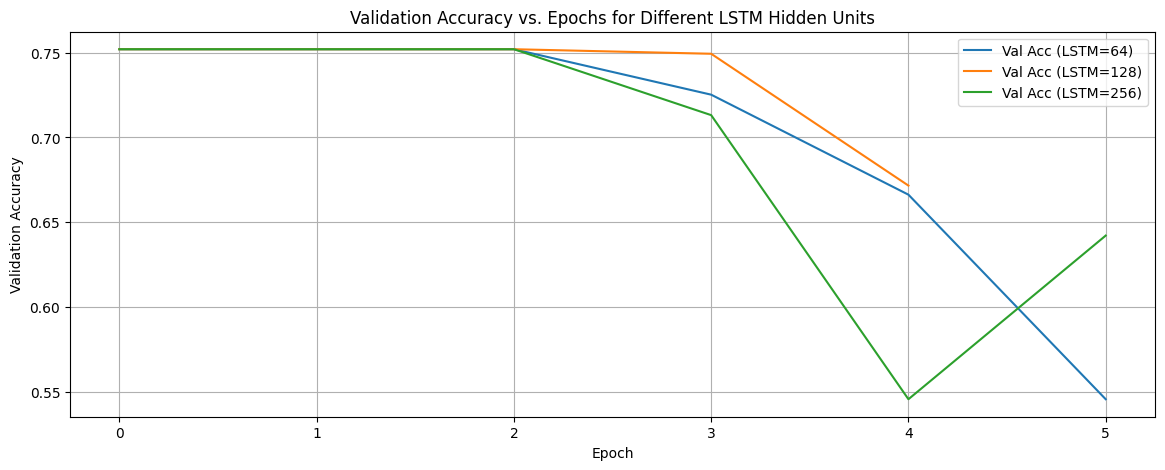

In [2]:

df['Year'] = df['Name'].str.extract(r'\((\d{4})\)')
df['Name'] = df['Name'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)
df = df.dropna(subset=['Rating'])
df['Rating'] = df['Rating'].astype(float)

def categorize_sentiment(rating):
    if rating >= 7.5:
        return 'Positive'
    elif 5.0 <= rating < 7.5:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Rating'].apply(categorize_sentiment)

X = df['Name']
y = df['Sentiment']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y_categorical, test_size=0.2, random_state=42)

# --- Try different LSTM hidden dimensions ---
lstm_units = [64, 128, 256]
results = []

for units in lstm_units:
    print(f"\nTraining with LSTM Hidden Units: {units}")

    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
    model.add(Dropout(0.3))  # Dropout after Embedding
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(0.3))  # Dropout after LSTM
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=64,
        callbacks=[early_stopping],
        verbose=0
    )

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy for LSTM units={units}: {acc*100:.2f}%")

    results.append((units, acc, history))

# --- Plot validation accuracy for each configuration ---
plt.figure(figsize=(14, 5))
for units, acc, history in results:
    plt.plot(history.history['val_accuracy'], label=f'Val Acc (LSTM={units})')

plt.title('Validation Accuracy vs. Epochs for Different LSTM Hidden Units')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
